# Strassen Algorithm

In [17]:
from StrassenMul import StrassenMul
from scipy import stats

import gc
import math
import matplotlib.pyplot as plt
import random
import timeit

## Small Example

In [3]:
a = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
b = [[17, 18, 19, 20], [21, 22, 23, 24], [25, 26, 27, 28], [29, 30, 31, 32]]

In [4]:
sm = StrassenMul(a, b)

In [5]:
 print(StrassenMul._split_array(a))

[[[[1, 2], [5, 6]], [[3, 4], [7, 8]]], [[[9, 10], [13, 14]], [[11, 12], [15, 16]]]]


In [6]:
print("s:",sm.mul_s())

s: [[250, 260, 270, 280], [618, 644, 670, 696], [986, 1028, 1070, 1112], [1354, 1412, 1470, 1528]]


In [7]:
print("n:",sm.mul_normal())

n: [[250, 260, 270, 280], [618, 644, 670, 696], [986, 1028, 1070, 1112], [1354, 1412, 1470, 1528]]


Strassen algorithm gives the same result as the naive matrix multiplication algorithm for given matrices:

In [8]:
sm.mul_s() == sm.mul_normal()

True

## Actual Tests

In [9]:
number_of_repeatings = 2
n_begin = 2
n_end = 20

Use ```timeit```for measuring the time used
https://docs.python.org/3/library/timeit.html

The garbage collector gets triggered inbetween each test, but not between repititions of the same test.

The number in each cell of the matrix is between $1$ and $100$ ($\forall a_{ij} \in A: 1\leq a_{ij} \leq 100$).

In [10]:
def execute_test(begin, end, func):
    execution_times = []
    for i in range(n_begin,n_end):
        n = func(i)
        print(i, n)

        a = [[random.randint(1,100) for x in range(n)] for y in range(n)]
        b = [[random.randint(1,100) for x in range(n)] for y in range(n)]

        sm = StrassenMul(a, b)

        gc.collect()
        time_needed2 = timeit.timeit(sm.mul_normal, number=number_of_repeatings)    
        gc.collect()
        time_needed1 = timeit.timeit(sm.mul_s, number=number_of_repeatings)

        entry = (time_needed1 / number_of_repeatings, time_needed2 / number_of_repeatings)
        print(entry)
        execution_times.append(entry)
    return execution_times

**Function used for selecting values on the x axis**

In [11]:
def gen_func(i):
    n = int(1.7**i) // 3 + 50
    n += n % 2
    return n

**Actually perform tests**

In [ ]:
execution_times = execute_test(n_begin, n_end, gen_func)

**Stored Result**

Ran before, but takes some time

In [58]:
execution_times = (
(0.023028587000226253, 0.021950408999600768),
(0.05400904950010954, 0.02511064950022046),
(0.031365172500045446, 0.025500247000309173),
(0.02895169600014924, 0.027607906999946863),
(0.03622940800005381, 0.034044164499846374),
(0.39772508650003147, 0.04588434049992429),
(0.06954833700001473, 0.07062140049993104),
(0.12275866749996567, 0.1283580424997126),
(0.2618281484997169, 0.27177629249990787),
(0.685324093500185, 0.7390732769999886),
(2.125755349499741, 2.6350586140001724),
(7.88076137049984, 10.779882045500017),
(32.2011498490001, 44.636283876499874),
(137.90924777650025, 198.3757300555003),
(576.0338819325002, 909.3076877150002))

### Results
#### Scaled linearly

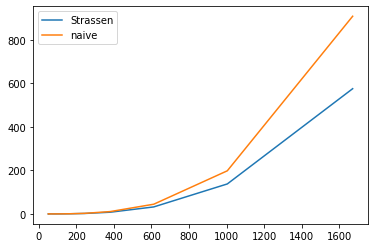

In [43]:
x_vals = [gen_func(i) for i in range(n_begin, len(execution_times)+n_begin)]
plt.plot(x_vals,[x[0] for x in execution_times], label="Strassen")
plt.plot(x_vals,[x[1] for x in execution_times], label="naive")
plt.legend(loc='upper left')

#### Scaled logarithmically
Scaled on both axis

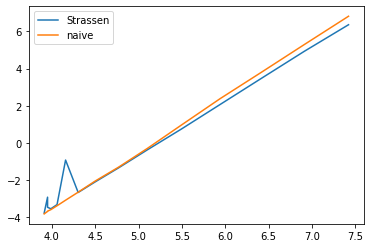

In [27]:
x_vals = [math.log(gen_func(i)) for i in range(n_begin, 17)]
plt.plot(x_vals,[math.log(x[0]) for x in execution_times], label="Strassen")
plt.plot(x_vals,[math.log(x[1]) for x in execution_times], label="naive")
plt.legend(loc='upper left')

### Determining the Slopes of the Result

In [53]:
def show_with_reg(y_data):
    # cutting the first elements until the linear part begins
    epsilon = 6
    a = [math.log(gen_func(i)) for i in range(n_begin + epsilon, len(y_data) + n_begin)]
    b = y_data[epsilon:]

    print(len(a), len(b))
    
    reg = stats.linregress(a, b)
    reg_vals = [y * reg.slope + reg.intercept for y in a]
    
    print("The slope is {:.3}.".format(reg.slope))
    
    print(stats.ttest_rel(b, reg_vals))

    plt.plot(a, b, label="Data")
    plt.plot(a, reg_vals, label="Fitted linear function {:.3}x+({:.3})".format(reg.slope, reg.intercept))
    plt.legend(loc='upper left')

#### Call the above Function

9 9
The slope is 2.91.
Ttest_relResult(statistic=4.989018505617743e-13, pvalue=0.9999999999996141)
9 9
The slope is 3.05.
Ttest_relResult(statistic=1.6849421054961462e-13, pvalue=0.9999999999998697)


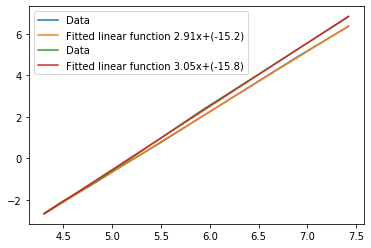

In [54]:
show_with_reg([math.log(x[0]) for x in execution_times])
show_with_reg([math.log(x[1]) for x in execution_times])

#### Conclusion

It can be seen that when both the x and the y axis are scaled logarithmically, that the slope of the fitted linear function belonging to the implementation of the Strassen algorithm is $2.91$, which is a little bit worse than $2.807$ (Strassen algorithm should be in $O(n^{log_2 7}) \approx O(2.807)$). The implementation of the Strassen algorithm is still faster than the one of the classical matrix multiplication algorithm which should be in $O(n^3)$, but actually has a slope of $3.05$ when both axis are scaled logarithmically.

### Above which $n$ is the Strassen algorithm faster than the classic one?

In [99]:
def gen_func_smaller(i):
    n = i * 30
    return n

In [100]:
number_of_repeatings = 3
n_begin = 0
n_end = 15

In [101]:
execution_times_smaller = execute_test(n_begin, n_end, gen_func_smaller)

0 0
(4.465333101203821e-06, 3.044666603576237e-06)
1 30
(0.006099681000099129, 0.004894899666699833)
2 60
(0.045992560000134595, 0.038103436999942154)
3 90
(0.12242754766672685, 0.12359880633327218)
4 120
(0.3345049019999351, 0.2891283273332495)
5 150
(0.5728517190000275, 0.6404531646667238)
6 180
(0.9881765226667388, 1.13761027966666)
7 210
(1.473752217333337, 2.106292948333248)
8 240
(2.4412148716664888, 2.359956754333325)
9 270
(3.18221516033312, 3.676449112666584)
10 300
(4.364497179000257, 4.9220511030001335)
11 330
(5.620109313666641, 6.855528465999972)
12 360
(6.747700865333172, 9.0431270679998)
13 390
(9.965378666666766, 11.80272173266682)
14 420
(10.933248918666626, 14.69108377599999)


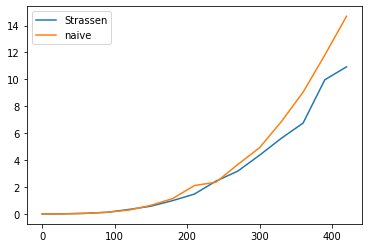

In [102]:
x_vals = [gen_func_smaller(i) for i in range(n_begin, len(execution_times_smaller)+n_begin)]
plt.plot(x_vals,[x[0] for x in execution_times_smaller], label="Strassen")
plt.plot(x_vals,[x[1] for x in execution_times_smaller], label="naive")
plt.legend(loc='upper left')

#### Conclusion

For matrices of size $\approx 250$ and above our implementation of the Strassen algorithm is faster than our implementation of the classic matrix multiplication algorithm. The test only ran for even numbers, because our implementation of the Strassen algorithm uses the classic matrix multiplication algorithm when the size of the matrix is odd.